In [1]:
from ebmdatalab import bq
from ebmdatalab import charts
from ebmdatalab import maps
import pandas as pd
import numpy as np

In [2]:
sql = '''
SELECT
  month,
  SUM(quantity) AS TotalPatches,
  SUM(actual_cost) AS TotalCost
FROM
  ebmdatalab.hscic.normalised_prescribing_standard AS presc
WHERE
  bnf_code LIKE "1502010J0%EL"
GROUP BY
  month,
  bnf_code,
  bnf_name
  '''

df_lidocaine = bq.cached_read(sql, csv_path='df_lidocaine.csv', use_cache=True)  # add `use_cache=False` to override
df_lidocaine.head()

C:\Users\bmackenna\Anaconda3\lib\site-packages\pandas_gbq\gbq.py:556: FutureWarning: verbose is deprecated and will be removed in a future version. Set logging level in order to vary verbosity
  "verbosity", FutureWarning, stacklevel=1)


,month,TotalPatches,TotalCost
0,2013-07-01,79489,177179.53000
1,2011-06-01,64503,143486.99000
2,2012-10-01,280750,625358.05000
3,2014-09-01,92335,206141.32000
4,2018-07-01,78850,176729.70162


(0, 750000)

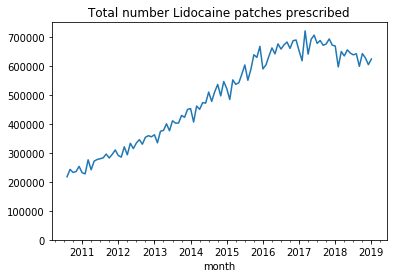

In [9]:
ax = df_lidocaine.groupby("month")['TotalPatches'].sum().plot(kind='line', title = "Total number Lidocaine patches prescribed")
ax.set_ylim(0, 750000)

(0, 1650000)

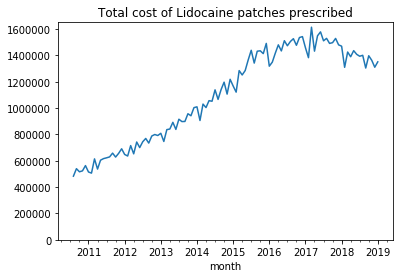

In [10]:
ax = df_lidocaine.groupby("month")['TotalCost'].sum().plot(kind='line', title = "Total cost of Lidocaine patches prescribed")
ax.set_ylim(0, 1650000)